# Football prediction

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> To create a model that will predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly while checking the rankings of the team.

### b) Defining the Metric for Success

The project will be considered a success if the models created are able to predict results of a game to an accuracy between 70-80%

### c) Understanding the context 

The men's FIFA World Ranking is a ranking system for men's national teams in association football. The teams of the men's member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest. The rankings were introduced in December 1992.

**How the rankings are calculated:**

The rankings are calculated using an algorithm called Elo.
The Elo method of calculation adds/subtracts points (as opposed to averaging points) for individual
matches to/from a team’s existing point total. The points which are added or subtracted are partially
determined by the relative strength of the two opponents, including the logical expectation that teams
higher in the ranking should fare better against teams lower in the ranking.




### d) Experimental design taken

In this study, we will be conducting Explorative Data Analysis, i.e Univariate, Bivariate and Multivariate Analysis to get the relationships and differences between different variables. We will also create models using polynomial regression and logistic regression


### e) Data Relevance

We will be using data two datasets


1.  FIFA rankings from 1993 to 2018 as fifa_rankings.csv

This one shows the FIFA ranking and points for the teams. It shows a monthly ranking of team performance
2.  International Soccer matches from 1872 to 2019 as results.csv

This one shows teams, scores, tournament type and country the game was played from

Both our datasets consists of information on football rankings over time and are therefore suitable to create a model that will be used to predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly while checking the rankings of the team.



## 2. Reading the Data

In [ ]:
#First we will import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Loading the Data from the source
# ---
ranking = pd.read_csv('fifa_ranking.csv')
#Previewing the upper part of the data
ranking.head(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [ ]:
# Loading the results Dataframe 
# ---
results = pd.read_csv('results.csv')

#Previewing the data
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


## 3. Checking the Datasets

In [ ]:
# Determining the no. of records in our dataset
#
print("The rows and columns for the ranking dataset: ", ranking.shape)
print("The rows and columns for the results dataset: ", results.shape)


The rows and columns for the ranking dataset:  (57793, 16)
The rows and columns for the results dataset:  (40839, 9)


In [ ]:
# Checking whether each column has an appropriate datatype

print("Datatypes for ranking dataset: ")
print(ranking.dtypes)
print("*****************")
print("Datatypes for results dataset: ")
print(results.dtypes)


Datatypes for ranking dataset: 
rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object
*****************
Datatypes for results dataset: 
date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object


## 4. Tidying the Dataset

In [ ]:
#First, we change the columns containing dates from the datatype object
#to datetime in both datasets
ranking['rank_date'] = pd.to_datetime(ranking['rank_date'])
results['date'] = pd.to_datetime(results['date'])

In [ ]:
#Checking for null values
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [ ]:
ranking.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [ ]:
# Checking for Anomalies
ranking['country_full'].unique()

array(['Germany', 'Italy', 'Switzerland', 'Sweden', 'Argentina',
       'Republic of Ireland', 'Russia', 'Brazil', 'Norway', 'Denmark',
       'England', 'France', 'Spain', 'Mexico', 'RCS', 'Netherlands',
       'Nigeria', 'Belgium', 'Colombia', 'Poland', 'Romania', 'Uruguay',
       'Portugal', 'Cameroon', 'Zambia', 'Egypt', 'Wales', 'USA',
       "Côte d'Ivoire", 'Scotland', 'Tunisia', 'Greece', 'Morocco',
       'Algeria', 'Ecuador', 'Korea Republic', 'Bulgaria', 'Austria',
       'Costa Rica', 'Northern Ireland', 'Honduras', 'Hungary', 'Japan',
       'Saudi Arabia', 'China PR', 'Canada', 'Finland', 'Ghana', 'Chile',
       'Zimbabwe', 'Qatar', 'Australia', 'Iceland', 'IR Iran',
       'United Arab Emirates', 'Yugoslavia', 'Iraq', 'Senegal', 'Bolivia',
       'Kuwait', 'Korea DPR', 'El Salvador', 'Turkey', 'Gabon', 'Guinea',
       'Thailand', 'Paraguay', 'Malawi', 'Israel', 'Peru', 'Zaire',
       'Cyprus', 'Singapore', 'Mali', 'Malaysia', 'Bermuda', 'Niger',
       'Syria', 'Bahr

In [ ]:
results['country'].unique()

array(['Scotland', 'England', 'Wales', 'Republic of Ireland',
       'United States', 'Uruguay', 'Austria', 'Hungary', 'Argentina',
       'Belgium', 'France', 'Netherlands', 'Bohemia', 'Switzerland',
       'Sweden', 'Germany', 'Italy', 'Chile', 'Norway', 'Finland',
       'Luxembourg', 'Russia', 'Denmark', 'Spain', 'Japan', 'Brazil',
       'Paraguay', 'China PR', 'Canada', 'Estonia', 'Guatemala',
       'Czechoslovakia', 'Poland', 'Yugoslavia', 'New Zealand', 'Romania',
       'Latvia', 'Portugal', 'Northern Ireland', 'Australia', 'Lithuania',
       'Turkey', 'Mexico', 'Aruba', 'Soviet Union', 'Haiti',
       'Philippines', 'Bulgaria', 'Jamaica', 'Kenya', 'Czech Republic',
       'Peru', 'Honduras', 'British Guyana', 'Uganda', 'El Salvador',
       'Barbados', 'Irish Free State', 'Trinidad and Tobago', 'Greece',
       'Curaçao', 'Egypt', 'Dominica', 'Guadeloupe', 'Palestine',
       'Netherlands Guyana', 'French Guiana', 'Cuba', 'Colombia',
       'Saint Kitts and Nevis', 'Éire', 

To continue with cleaning the dataset and further move to feature engineering, it is important for us to gauge which variables will be necessary for our analysis and also classify which variables will be used as features and which will be the target.

**Target**: Since we are creating a model that can predict results of a football match, **results will be our target**

**Features**: the following will be the features used in the model to predict the results; **rank, country, weighted_points, year, home_team, away_team, home_score, away_score tournament**

In [ ]:
#Droppping columns

ranking = ranking.drop(columns=['country_abrv', 'total_points','previous_points', 
                                 'rank_change', 'cur_year_avg','last_year_avg', 'last_year_avg_weighted',
                                 'two_year_ago_avg','three_year_ago_avg','confederation'])
ranking.head(3)

,rank,country_full,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,rank_date
0,1,Germany,0.0,0.0,0.0,1993-08-08
1,2,Italy,0.0,0.0,0.0,1993-08-08
2,3,Switzerland,0.0,0.0,0.0,1993-08-08


In [ ]:
#Calculating the  sum of the weighted points
ranking['weighted_points'] =  ranking['cur_year_avg_weighted'] + ranking['two_year_ago_weighted'] + ranking['three_year_ago_weighted']
ranking.head(2)

,rank,country_full,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,rank_date,weighted_points
0,1,Germany,0.0,0.0,0.0,1993-08-08,0.0
1,2,Italy,0.0,0.0,0.0,1993-08-08,0.0


Rankings points on the fifa ranking dataset started from 21/09/2011, we will threfore use data from 21/09/2011 onwards for this analysis

In [ ]:
ranking = ranking[ranking['rank_date'] > '2011-08-24']
results = results[results['date'] > '2011-08-24']
print("Shape of ranking: ", ranking.shape)
print("Shape of results: ", results.shape)

Shape of ranking:  (17208, 7)
Shape of results:  (7558, 9)


In [ ]:
#Now we change the columns containing dates to year
import datetime

ranking['year'] = ranking['rank_date'].dt.year
ranking.tail()


,rank,country_full,cur_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,rank_date,weighted_points,year
57788,206,Anguilla,0.0,0.0,0.0,2018-06-07,0.0,2018
57789,206,Bahamas,0.0,0.0,0.0,2018-06-07,0.0,2018
57790,206,Eritrea,0.0,0.0,0.0,2018-06-07,0.0,2018
57791,206,Somalia,0.0,0.0,0.0,2018-06-07,0.0,2018
57792,206,Tonga,0.0,0.0,0.0,2018-06-07,0.0,2018


In [ ]:
results['year'] = results['date'].dt.year
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
33281,2011-08-25,United Arab Emirates,Qatar,3,1,Friendly,al-Ain,United Arab Emirates,False,2011
33282,2011-08-26,Bahrain,Sudan,1,0,Friendly,Riffa,Bahrain,False,2011
33283,2011-08-27,Angola,DR Congo,1,2,Friendly,Dundo,Angola,False,2011
33284,2011-08-27,Fiji,Tahiti,3,0,Pacific Games,Boulari,New Caledonia,True,2011
33285,2011-08-27,Jordan,Indonesia,1,0,Friendly,Amman,Jordan,False,2011


The rankings_df runs from the year 2011 to the year 2018 whereas the results_df runs to the year 2019. For data balance we will remove data for the year 2019 in the results_df

In [ ]:
#Standardizing the dataset
results_df2 = results[results['year'] < 2019]
results_df2.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
40346,2018-12-30,Yemen,Syria,0,1,Friendly,Abu Dhabi,United Arab Emirates,True,2018
40347,2018-12-31,South Korea,Saudi Arabia,0,0,Friendly,Abu Dhabi,United Arab Emirates,True,2018
40348,2018-12-31,Kyrgyzstan,Palestine,2,1,Friendly,Doha,Qatar,True,2018
40349,2018-12-31,Philippines,Vietnam,2,4,Friendly,Doha,Qatar,True,2018
40350,2018-12-31,Qatar,Iran,1,2,Friendly,Doha,Qatar,False,2018


In [ ]:
#Dropping unnecessary columns from both datasets

ranking_df2= ranking.drop(columns=['cur_year_avg_weighted','two_year_ago_weighted','three_year_ago_weighted'])
ranking_df2.head()

,rank,country_full,rank_date,weighted_points,year
40585,1,Spain,2011-09-21,1101.27,2011
40586,2,Netherlands,2011-09-21,1089.24,2011
40587,3,Germany,2011-09-21,829.26,2011
40588,4,Uruguay,2011-09-21,791.79,2011
40589,5,Portugal,2011-09-21,862.16,2011


In [ ]:
#Dropping columns for results dataset

results_df2 = results_df2.drop(columns=['date','city','neutral'])
results_df2.tail(3)

,home_team,away_team,home_score,away_score,tournament,country,year
40348,Kyrgyzstan,Palestine,2,1,Friendly,Qatar,2018
40349,Philippines,Vietnam,2,4,Friendly,Qatar,2018
40350,Qatar,Iran,1,2,Friendly,Qatar,2018


In [ ]:
#Joining both tables to form one dataset

combo = results_df2.merge(ranking_df2, left_on=['home_team', 'year'], right_on=['country_full', 'year'], how='inner')
combo = combo.merge(ranking_df2, left_on=['away_team', 'year'], right_on=['country_full', 'year'], how='inner')
combo.drop(['country', 'year', 'country_full_x', 'country_full_y'], axis=1, inplace=True)
combo.head()

,home_team,away_team,home_score,away_score,tournament,rank_x,rank_date_x,weighted_points_x,rank_y,rank_date_y,weighted_points_y
0,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,100,2011-09-21,291.93
1,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,92,2011-10-19,305.53
2,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,95,2011-11-23,333.73
3,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,93,2011-12-21,314.79
4,United Arab Emirates,Qatar,3,1,Friendly,113,2011-10-19,169.00,100,2011-09-21,291.93


In [ ]:
#Changing column names
combo.rename(columns={'rank_x':'home_team_rank',
                     'rank_y':'away_team_rank',
                     'weighted_points_x':'home_team_weighted_points',
                     'weighted_points_y':'away_team_weighted_points'}, 
                 inplace=True)
 
combo.head()

,home_team,away_team,home_score,away_score,tournament,home_team_rank,rank_date_x,home_team_weighted_points,away_team_rank,rank_date_y,away_team_weighted_points
0,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,100,2011-09-21,291.93
1,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,92,2011-10-19,305.53
2,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,95,2011-11-23,333.73
3,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,93,2011-12-21,314.79
4,United Arab Emirates,Qatar,3,1,Friendly,113,2011-10-19,169.00,100,2011-09-21,291.93


Our merged dataset has no null values and the datatypes are also appropriate hence no more data cleaning required, we therefore move to EDA

## 5. Exploratory Data Analysis

In [ ]:
combo.describe()

,home_score,away_score,home_team_rank,home_team_weighted_points,away_team_rank,away_team_weighted_points
count,690264.000000,690264.000000,690264.000000,690264.000000,690264.000000,690264.000000
mean,1.530968,1.049703,81.012918,398.840025,84.754694,379.836261
std,1.494180,1.224868,53.825916,270.077590,54.184892,263.029589
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,35.000000,194.370000,39.000000,180.270000
50%,1.000000,1.000000,75.000000,337.630000,80.000000,319.800000
75%,2.000000,2.000000,121.000000,555.180000,125.000000,530.170000
max,15.000000,10.000000,209.000000,1511.500000,209.000000,1511.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f09a85b32b0>,
      dtype=object)

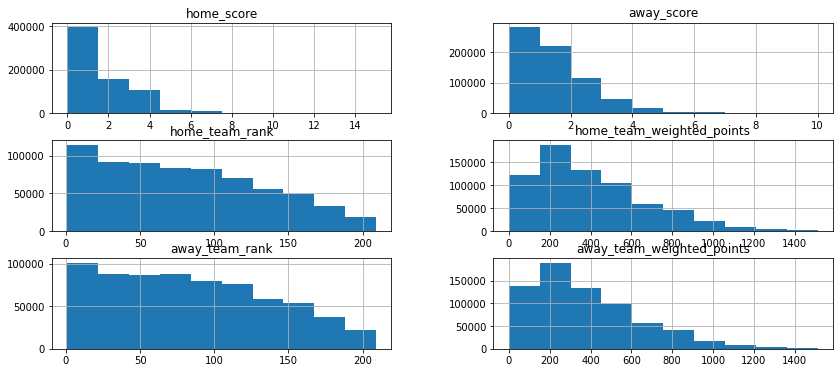

In [ ]:
#Checking for data distribution
combo.hist(bins=10, figsize=[14,6])

Our data is not normally distributed

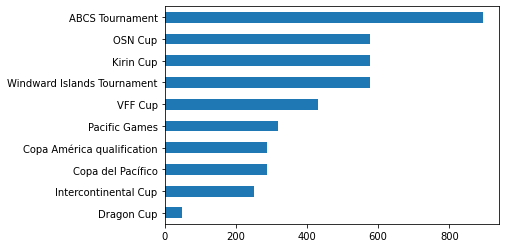

In [ ]:
#Checking tournament type value counts
combo.tournament.value_counts().sort_values().head(10).plot(kind = 'barh')
#The tournament type ABCS recorded the highest number of matches

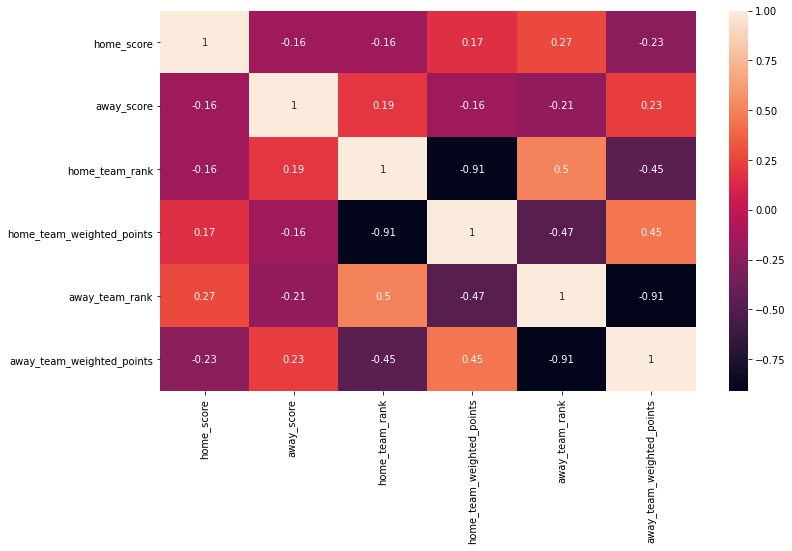

In [ ]:
#Checking for feature correlation
plt.subplots(figsize=(12,7))
sns.heatmap(combo.corr(method='pearson'), annot=True)

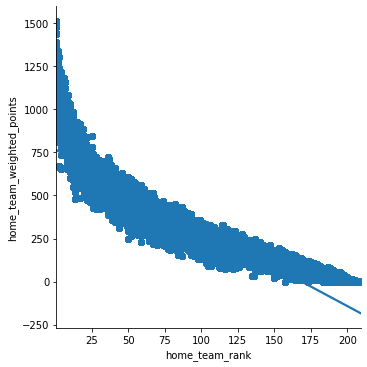

In [ ]:
 sns.lmplot(x="home_team_rank", y="home_team_weighted_points", data=combo)

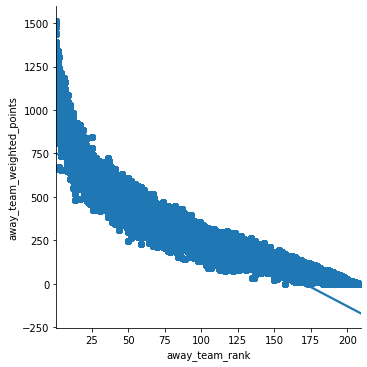

In [ ]:
sns.lmplot(x="away_team_rank", y="away_team_weighted_points", data=combo)

There is a strong negative correlation between rank and weighted points for teams: The teams with very high weighted points rank high and those with low weighted points rank the least, for example a team with aweighted points at 1400 ranks first and vice versa 

Other features show a weak correlation




## 6. Feature Engineering

First we create a new column 'Status' that contains results on whether a match was a win, lose or draw from the home team perspective

In [ ]:
#Creating a new column 'Status' 
def f(row):
    if row['home_score'] == row['away_score']:
        val = 'Draw'
    elif row['home_score'] > row['away_score']:
        val = 'Win'
    else:
        val = 'Lose'
    return val

combo['Status'] = combo.apply(f, axis=1)

print(combo.info())
combo.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690264 entries, 0 to 690263
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   home_team                  690264 non-null  object        
 1   away_team                  690264 non-null  object        
 2   home_score                 690264 non-null  int64         
 3   away_score                 690264 non-null  int64         
 4   tournament                 690264 non-null  object        
 5   home_team_rank             690264 non-null  int64         
 6   rank_date_x                690264 non-null  datetime64[ns]
 7   home_team_weighted_points  690264 non-null  float64       
 8   away_team_rank             690264 non-null  int64         
 9   rank_date_y                690264 non-null  datetime64[ns]
 10  away_team_weighted_points  690264 non-null  float64       
 11  Status                     690264 non-null  object  

,home_team,away_team,home_score,away_score,tournament,home_team_rank,rank_date_x,home_team_weighted_points,away_team_rank,rank_date_y,away_team_weighted_points,Status
0,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,100,2011-09-21,291.93,Win
1,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,92,2011-10-19,305.53,Win
2,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,95,2011-11-23,333.73,Win


Then we change the categorical columns into binary

In [ ]:
#Change status and tournament to categories
combo['tournament'] = combo['tournament'].astype('category')
combo['Status'] = combo['Status'].astype('category')
combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690264 entries, 0 to 690263
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   home_team                  690264 non-null  object        
 1   away_team                  690264 non-null  object        
 2   home_score                 690264 non-null  int64         
 3   away_score                 690264 non-null  int64         
 4   tournament                 690264 non-null  category      
 5   home_team_rank             690264 non-null  int64         
 6   rank_date_x                690264 non-null  datetime64[ns]
 7   home_team_weighted_points  690264 non-null  float64       
 8   away_team_rank             690264 non-null  int64         
 9   rank_date_y                690264 non-null  datetime64[ns]
 10  away_team_weighted_points  690264 non-null  float64       
 11  Status                     690264 non-null  category

In [ ]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Status'. 
combo['Status']= label_encoder.fit_transform(combo['Status']) 
  
print(combo['Status'].unique()) 
combo.head()
#Where 2:win, 1: lose, 0:Draw

[2 0 1]


,home_team,away_team,home_score,away_score,tournament,home_team_rank,rank_date_x,home_team_weighted_points,away_team_rank,rank_date_y,away_team_weighted_points,Status
0,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,100,2011-09-21,291.93,2
1,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,92,2011-10-19,305.53,2
2,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,95,2011-11-23,333.73,2
3,United Arab Emirates,Qatar,3,1,Friendly,112,2011-09-21,168.98,93,2011-12-21,314.79,2
4,United Arab Emirates,Qatar,3,1,Friendly,113,2011-10-19,169.00,100,2011-09-21,291.93,2


In [ ]:
# Encode labels in column 'touranament'. 
combo['tournament']= label_encoder.fit_transform(combo['tournament']) 
  
print(combo['tournament'].unique()) 
combo.head()


[22 21 10  7 32 31  0 36 18 33  6 34  8 40 35 17  3  5 19 28 26 39  9 12
 11 30 24  2  4 13 14 29 23 38 20 41  1 15 27 16 37 25]


,home_team,away_team,home_score,away_score,tournament,home_team_rank,rank_date_x,home_team_weighted_points,away_team_rank,rank_date_y,away_team_weighted_points,Status
0,United Arab Emirates,Qatar,3,1,22,112,2011-09-21,168.98,100,2011-09-21,291.93,2
1,United Arab Emirates,Qatar,3,1,22,112,2011-09-21,168.98,92,2011-10-19,305.53,2
2,United Arab Emirates,Qatar,3,1,22,112,2011-09-21,168.98,95,2011-11-23,333.73,2
3,United Arab Emirates,Qatar,3,1,22,112,2011-09-21,168.98,93,2011-12-21,314.79,2
4,United Arab Emirates,Qatar,3,1,22,113,2011-10-19,169.00,100,2011-09-21,291.93,2


As explained earlier we will use Polynomial Regression and logistic Regression for this study.
For polynomial approach we will use two models:

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

We will separate our combo into two to prepare it for modelling using both models


## Approach 1: Using Polynomial regression.
Create a model that can predict how many goals the home team scores

### *Predicting home score*

In [ ]:
# Selecting columns relevant to the reasearch question
#
dataset = matches[['home_team',	'away_team',	'home_score',	'away_score',	'tournament', 'home_team_rank', 'away_team_rank']]

# Previewing the first five rows of the dataset
#
dataset.head()

,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank
0,United Arab Emirates,Qatar,3,1,22,112,100
1,United Arab Emirates,Qatar,3,1,22,112,92
2,United Arab Emirates,Qatar,3,1,22,112,95
3,United Arab Emirates,Qatar,3,1,22,112,93
4,United Arab Emirates,Qatar,3,1,22,113,100


#### Checking for multicollinearity
[Multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) refers to a situation in which two or more explanatory variables in a multiple regression model are highly linearly related. We have perfect multicollinearity if, for example as in the equation above, the correlation between two independent variables is equal to 1 or −1

In [ ]:
# Displaying the correlations between the variables
#
corrs = dataset.drop('home_score', axis = 1).corr()
corrs

,away_score,tournament,home_team_rank,away_team_rank
away_score,1.000000,0.027141,0.194509,-0.212452
tournament,0.027141,1.000000,-0.196711,-0.197538
home_team_rank,0.194509,-0.196711,1.000000,0.501955
away_team_rank,-0.212452,-0.197538,0.501955,1.000000


*The tabe above shows how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. The correlations have been used to compute the VIF (Variance Inflation Factor) score for each variable.The VIF is created by finding the inverse matrix of the correations matrix.*

In [ ]:
# Creating a dataframe of the VIF
#
vif_df = pd.DataFrame(np.linalg.inv(corrs.values), index = corrs.index, columns = corrs.columns)
vif_df

,away_score,tournament,home_team_rank,away_team_rank
away_score,1.200487,-0.030951,-0.487335,0.493552
tournament,-0.030951,1.055366,0.150095,0.126558
home_team_rank,-0.487335,0.150095,1.552594,-0.853218
away_team_rank,0.493552,0.126558,-0.853218,1.558134


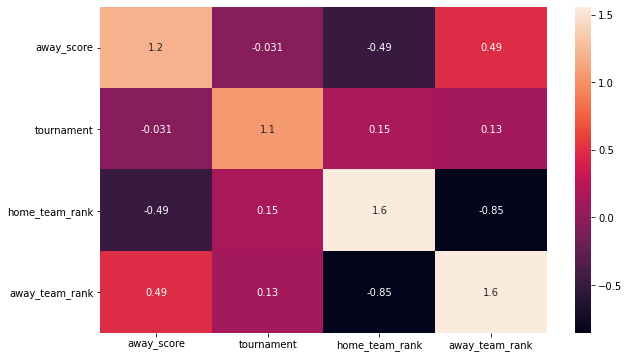

In [ ]:
# Creating a heatmap of the vif_df
#
plt.figure(figsize = (10, 6))
sns.heatmap(vif_df, annot = True)
plt.show()

*The VIF score for each variable is found alongside the downwards sloping diagonal. All of this scores are under 5, therefore there is no multicollinearity*

#### Creating the polynomial model

In [ ]:
#Import libaries
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error


In [ ]:
# Creating X and y variables
#
X = dataset.iloc[:, [0, 1, 3, 4, 5, 6]]
y = dataset.home_score

# Encoding categorical variables
#
X = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Standardising the X_train and the X_test to the same scale
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting the polynomial features to the X_train and X_test
#
poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

# Training the model
#
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions
#
y_pred = regressor.predict(X_test)

# Measuring the accuracy of the model
#
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.1748404802294694


*The lower the RMSE of a model, the better the performance of the model. Therefore, this model is fairly good in making predictions*

#### Hyperparameter tuning to find the optimal parameters for the model

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
import scipy as sp
from sklearn.model_selection import KFold

In [ ]:
# Tuning the parameters of the linear regression model to find the optimal 
# Printing the Linear Regression model parameters that can be tuned
#
from sklearn.linear_model import LinearRegression
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# The parameters that can be tuned are fitting the intercept and normalizing
# Creating a parameters dictionary
#
params = {'normalize': [True, False],
         'fit_intercept': [True, False]}

# Creating a cross validation of 5 folds
#
kfold = KFold(n_splits = 5)

# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=regressor, param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'Best score is {grid_search.best_score_} and the best parameters are {grid_search.best_params_}')

Best score is -1757909853725342.8 and the best parameters are {'fit_intercept': False, 'normalize': True}


*The optimal parameters for this model are {'fit_intercept': True, 'normalize': False}*

#### Performing cross validation to check for overfitting or underfitting

In [ ]:
# Performing cross validation of 5 folds
#
scores = cross_val_score(regressor, X, y, scoring = 'neg_mean_squared_error', cv = 5)

# Calculating the mean of the cross validation scores
#
print(f'Mean of cross validation scores is {np.round(scores.mean()*-1, 3)}')

# Calculating the variance of the cross validation scores from the mean
#
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is 8.09255024101926e+16
Standard deviation of the cross validation scores is 1.5589581053757232e+17


*From the above mean and standard deviation it can be seen the model is fairly stable, as it varies only by 1.559, from the mean*

#### Checking the appripriateness of the model using a residual plot
A [residual](https://stattrek.com/statistics/dictionary.aspx?definition=residual%20plot) plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

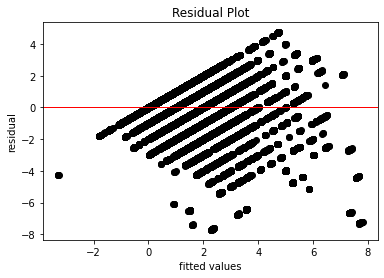

In [ ]:
# Plotting the residual plot
# Residuals have been calculated by by substracting the test value from the predicted value
# 
residuals = np.subtract(y_pred, y_test)

# Plotting the residual scatterplot
#
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

*The residuals are centered around a mean that is very close to 0, and there are no glaringly obvious patterns. 
This shows that the model is fairly good*

#### Heteroskedasticity test using the barlett's test
The concept of [heteroscedasticity](https://www.xlstat.com/en/solutions/features/heteroscedasticity-tests) - is used in statistics, especially in the context of linear regression or for time series analysis, to describe the case where the variance of errors or the model is not the same for all observations, while often one of the basic assumption in modeling is that the variances are homogeneous and that the errors of the model are identically distributed.

The barlett's test establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints

In [ ]:
# Performing the barlett's test
#
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# Calculating the critical value of the chi squared distribution, to compare it with the test_result
#
degrees_of_freedom = len(y_pred) - 1
probability =  1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degrees_of_freedom)

# If the test_result is greater than the critical value, then the null hypothesis is
# rejected. This means that there are patterns to the variance of the data

# Otherwise, if no patterns are identified, null hypothesis is accepted. This means that 
# the variance is homogeneous across the dataset

if (test_result > critical_value):
  print(f'The test result of {np.round(test_result,2)} is greater than the critical value of {np.round(critical_value, 2)}')
  print('Thefore the variances are unequal, which means that the model should be reassessed')
  print('The variances are heterogenous')
else:
  print(f'The test result of {np.round(test_result,2)} is less than the critical value of {np.round(critical_value, 2)}')
  print('Thefore the variances are equal, which means that the model is okey. No need to reasses')
  print('The variances are homogeneous')

The test result of 9745.6 is less than the critical value of inf
Thefore the variances are equal, which means that the model is okey. No need to reasses
The variances are homogeneous


## Approach 2: Using Logistic Regression.
Create a model that can predict whether the home team will win, draw or lose

In [ ]:
# Selecting the relevant features for the logistic regression model
#
data = combo[['home_team',	'away_team',	'home_score',	'away_score',	'tournament', 'home_team_rank', 'away_team_rank', 'Status']]

# Previewing the first five rows of the data
#
data.head()

,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,Status
0,United Arab Emirates,Qatar,3,1,22,112,100,2
1,United Arab Emirates,Qatar,3,1,22,112,92,2
2,United Arab Emirates,Qatar,3,1,22,112,95,2
3,United Arab Emirates,Qatar,3,1,22,112,93,2
4,United Arab Emirates,Qatar,3,1,22,113,100,2


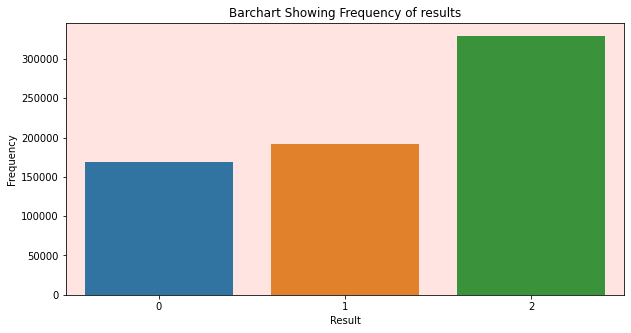

In [ ]:
# Checking whether the data is well balanced between all the results; win draw or lose
#
plt.figure(figsize = (10, 5))
ax = sns.countplot(data.Status)
ax.set_facecolor('mistyrose')
plt.ylabel('Frequency')
plt.xlabel('Result')
plt.title('Barchart Showing Frequency of results')
plt.show()

#Where 2:win, 1: lose, 0:Draw

*From the above chart, the results are fairly balanced*

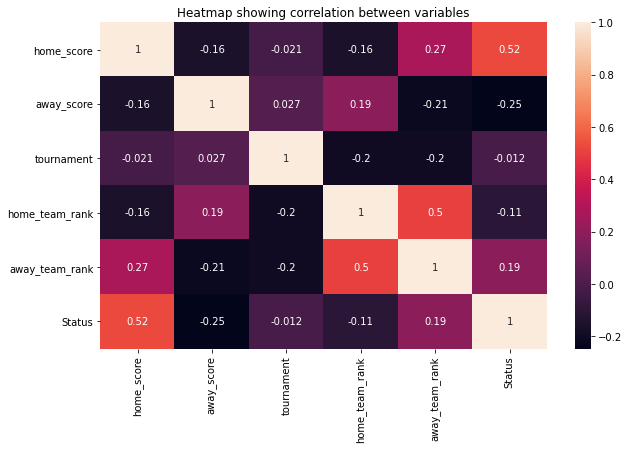

In [ ]:
# Checking for correlations between features
#
plt.figure(figsize = (10, 6))
sns.heatmap(data.corr(), annot = True) 
plt.title('Heatmap showing correlation between variables')
plt.show()

#### Creating a LogisticRegression model

In [ ]:
# Splitting the data into features and the target variable
#

from sklearn.linear_model import LogisticRegression
X = data.drop('Status', axis = 1)
y = data.Status

# Encoding the categorical features
#
X = pd.get_dummies(X, drop_first=True)

# Spliting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Instantiating the model and training the model
#
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# Making predictions
#
y_pred = logistic.predict(X_test)



In [ ]:
# Measuring the accuracy of the model
#
print(f'The accuracy of the model is {accuracy_score(y_test, y_pred)}')


The accuracy of the model is 1.0


In [ ]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[42574,     0,     0],
       [    0, 47845,     0],
       [    0,     0, 82147]])

*The model above has an accuracy of approximately 100% 
The model is clearly overfitting on the training data; further investigation and assessment is needed*

#### Hyperparameter tuning

In [ ]:
# Displaying parameters of the logistic regression model that can be tuned
#
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Creating a dictionary of parameters to be tuned
#
params = {'C': [1.0, 5.0],
         'penalty': ['l1', 'l2']}

logistic = LogisticRegression()

# Creating a cross validation of 10 folds
#
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=logistic, param_grid = params, cv = kfold, scoring = 'accuracy')

# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'Best score is {grid_search.best_score_} and the best parameters are {grid_search.best_params_}')

Best score is 1.0 and the best parameters are {'C': 1.0, 'penalty': 'l2'}


*From above, it can observed that the best parameters are {'C': 1.0, 'penalty': 'l2'} L2 works very well to avoid over-fitting issue*